## Loading Histograms

In [51]:
Gmag = scipy.io.loadmat('../data/histv3/magnitude.mat')
Gdir = scipy.io.loadmat('../data/histv3/direction.mat')
jointhistogram = scipy.io.loadmat('../data/histv3/JointHistogram.mat')
pyramidalhistogram = scipy.io.loadmat('../data/histv3/PyramidalHistogram.mat')
divcurlhistogram = scipy.io.loadmat('../data/histv3/DivCurlHistogram.mat')
pyramidalvector = scipy.io.loadmat('../data/histv3/PyramidalVectorHistogram.mat')
listfeatures = {'gmag':Gmag, 'gdir':Gdir, 'joint': jointhistogram, 'pyramidal': pyramidalhistogram,\
                'pvector': pyramidalvector, 'divcurl': divcurlhistogram}

In [52]:
features = listfeatures['gmag']['listfeatures']
y = np.asarray([x[1][0][0] for x in features])
testlabels = y[404:584]
testlabels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=uint8)

In [53]:
trainlabels=np.append(y[:404], y[584:])
trainlabels.shape

(986,)

In [55]:
features = listfeatures['pvector']['listfeatures']
Xpvector = np.asarray([x[0][0] for x in features])
features = listfeatures['divcurl']['listfeatures']
Xdivcurl = np.asarray([x[0][0] for x in features])
features = listfeatures['pyramidal']['listfeatures']
Xpyr = np.asarray([x[0][0] for x in features])
features = listfeatures['gmag']['listfeatures']
Xmag = np.asarray([x[0][0] for x in features])
features = listfeatures['gdir']['listfeatures']
Xdir = np.asarray([x[0][0] for x in features])
trainXmag=np.append(Xmag[:404], Xmag[584:],axis=0)
trainXdir=np.append(Xdir[:404], Xdir[584:],axis=0)
trainXpyr=np.append(Xpyr[:404], Xpyr[584:],axis=0)
trainXpvector=np.append(Xpvector[:404], Xpvector[584:],axis=0)
trainXdivcurl=np.append(Xdivcurl[:404], Xdivcurl[584:],axis=0)
print trainXmag.shape, trainXdir.shape, trainXpyr.shape, trainXdivcurl.shape, trainXpvector.shape

(986, 256) (986, 256) (986, 2304) (986, 768) (986, 10752)


### Mean

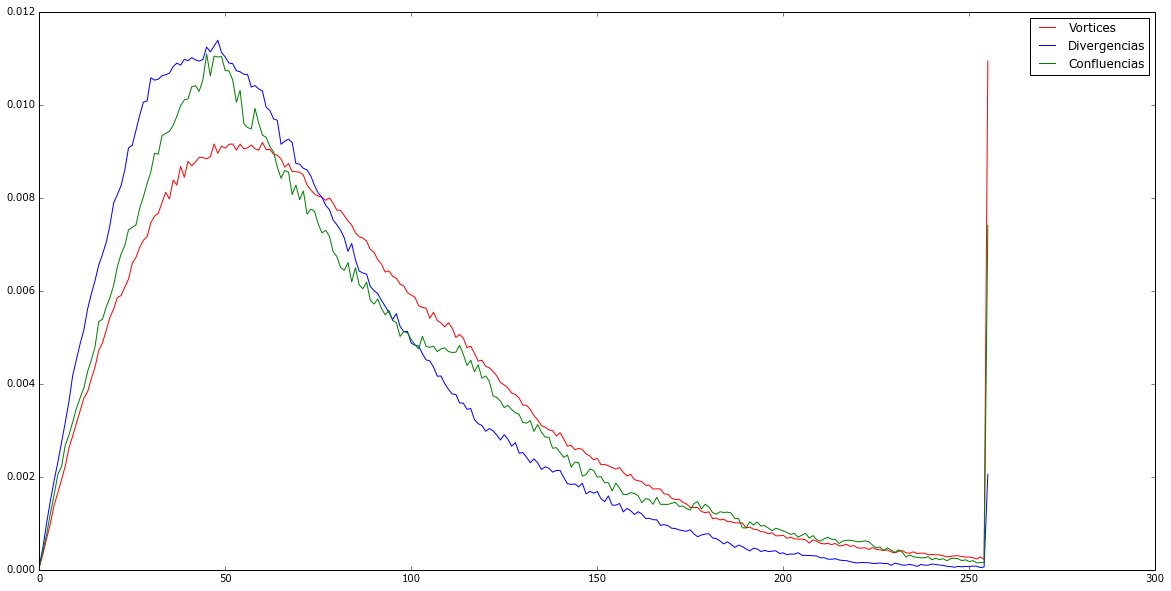

In [35]:
label = np.array([[x] for x in trainlabels])
histdf = np.concatenate((trainXmag,label), axis=1)
histdf = pd.DataFrame(histdf)
tmp = histdf[histdf.ix[:,len(histdf.columns)-1] == 1]
class1 = tmp.ix[:,:len(tmp.columns)-2]
tmp = histdf[histdf.ix[:,len(histdf.columns)-1] == 2]
class2 = tmp.ix[:,:len(tmp.columns)-2]
tmp = histdf[histdf.ix[:,len(histdf.columns)-1] == 3]
class3 = tmp.ix[:,:len(tmp.columns)-2]
fig = plt.figure(figsize=(20,10))
plt.plot(range(256), np.mean(class1, axis=0), 'r-', label='Vortices')
plt.plot(range(256), np.mean(class2, axis=0), 'b-', label='Divergencias')
plt.plot(range(256), np.mean(class3, axis=0), 'g-', label='Confluencias')
#plt.axis([0, 6, 0, 20])
plt.legend()
plt.show()

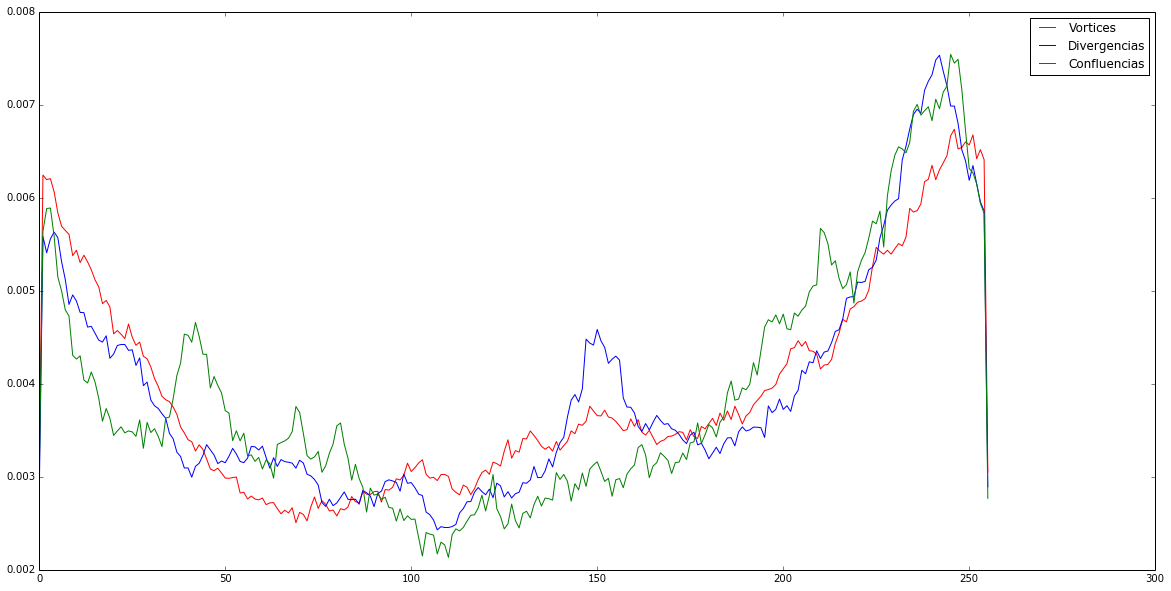

In [36]:
label = np.array([[x] for x in trainlabels])
histdf = np.concatenate((trainXdir,label), axis=1)
histdf = pd.DataFrame(histdf)
tmp = histdf[histdf.ix[:,len(histdf.columns)-1] == 1]
class1 = tmp.ix[:,:len(tmp.columns)-2]
tmp = histdf[histdf.ix[:,len(histdf.columns)-1] == 2]
class2 = tmp.ix[:,:len(tmp.columns)-2]
tmp = histdf[histdf.ix[:,len(histdf.columns)-1] == 3]
class3 = tmp.ix[:,:len(tmp.columns)-2]
fig = plt.figure(figsize=(20,10))
plt.plot(range(256), np.mean(class1, axis=0), 'r-', label='Vortices')
plt.plot(range(256), np.mean(class2, axis=0), 'b-', label='Divergencias')
plt.plot(range(256), np.mean(class3, axis=0), 'g-', label='Confluencias')
#plt.axis([0, 6, 0, 20])
plt.legend()
plt.show()

### Median

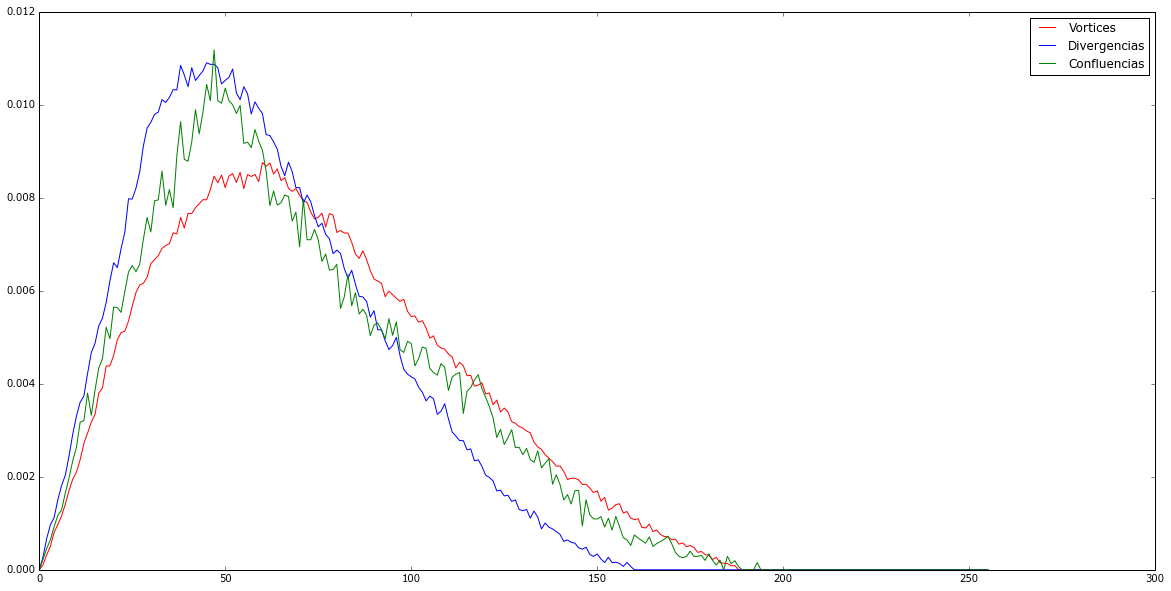

In [37]:
label = np.array([[x] for x in trainlabels])
histdf = np.concatenate((trainXmag,label), axis=1)
histdf = pd.DataFrame(histdf)
tmp = histdf[histdf.ix[:,len(histdf.columns)-1] == 1]
class1 = tmp.ix[:,:len(tmp.columns)-2]
tmp = histdf[histdf.ix[:,len(histdf.columns)-1] == 2]
class2 = tmp.ix[:,:len(tmp.columns)-2]
tmp = histdf[histdf.ix[:,len(histdf.columns)-1] == 3]
class3 = tmp.ix[:,:len(tmp.columns)-2]
fig = plt.figure(figsize=(20,10))
plt.plot(range(256), np.median(class1, axis=0), 'r-', label='Vortices')
plt.plot(range(256), np.median(class2, axis=0), 'b-', label='Divergencias')
plt.plot(range(256), np.median(class3, axis=0), 'g-', label='Confluencias')
#plt.axis([0, 6, 0, 20])
plt.legend()
plt.show()

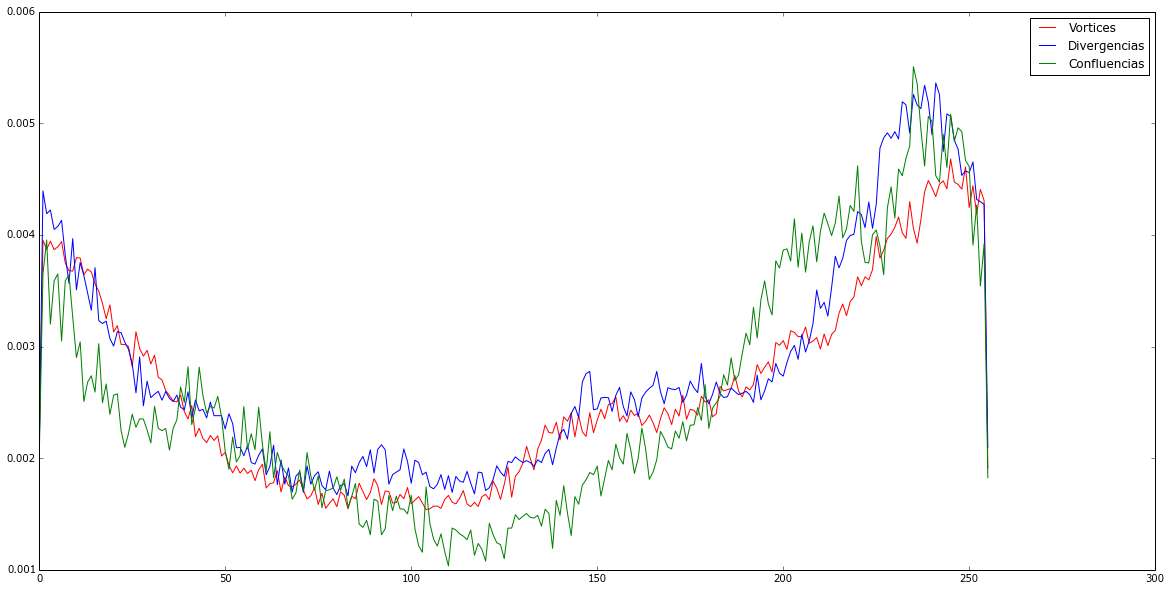

In [38]:
label = np.array([[x] for x in trainlabels])
histdf = np.concatenate((trainXdir,label), axis=1)
histdf = pd.DataFrame(histdf)
tmp = histdf[histdf.ix[:,len(histdf.columns)-1] == 1]
class1 = tmp.ix[:,:len(tmp.columns)-2]
tmp = histdf[histdf.ix[:,len(histdf.columns)-1] == 2]
class2 = tmp.ix[:,:len(tmp.columns)-2]
tmp = histdf[histdf.ix[:,len(histdf.columns)-1] == 3]
class3 = tmp.ix[:,:len(tmp.columns)-2]
fig = plt.figure(figsize=(20,10))
plt.plot(range(256), np.median(class1, axis=0), 'r-', label='Vortices')
plt.plot(range(256), np.median(class2, axis=0), 'b-', label='Divergencias')
plt.plot(range(256), np.median(class3, axis=0), 'g-', label='Confluencias')
#plt.axis([0, 6, 0, 20])
plt.legend()
plt.show()

## Visualizing Histograms

In [3]:
features = listfeatures['joint']['listfeatures']
Xjoint = np.asarray([x[0][0] for x in features])
labelmag = np.asarray([x[1][0][0] for x in features])
label = np.array([[x] for x in labelmag])
histdf = np.concatenate((Xjoint,label), axis=1)
histdf = pd.DataFrame(histdf)

tmp = histdf[histdf.ix[:,len(histdf.columns)-1] == 1]
class1 = tmp.ix[:,:len(tmp.columns)-2]
tmp = histdf[histdf.ix[:,len(histdf.columns)-1] == 2]
class2 = tmp.ix[:,:len(tmp.columns)-2]
tmp = histdf[histdf.ix[:,len(histdf.columns)-1] == 3]
class3 = tmp.ix[:,:len(tmp.columns)-2]

In [4]:
m1=np.reshape(np.mean(class1),(16,16))
m2=np.reshape(np.mean(class2),(16,16))
m3=np.reshape(np.mean(class3),(16,16))

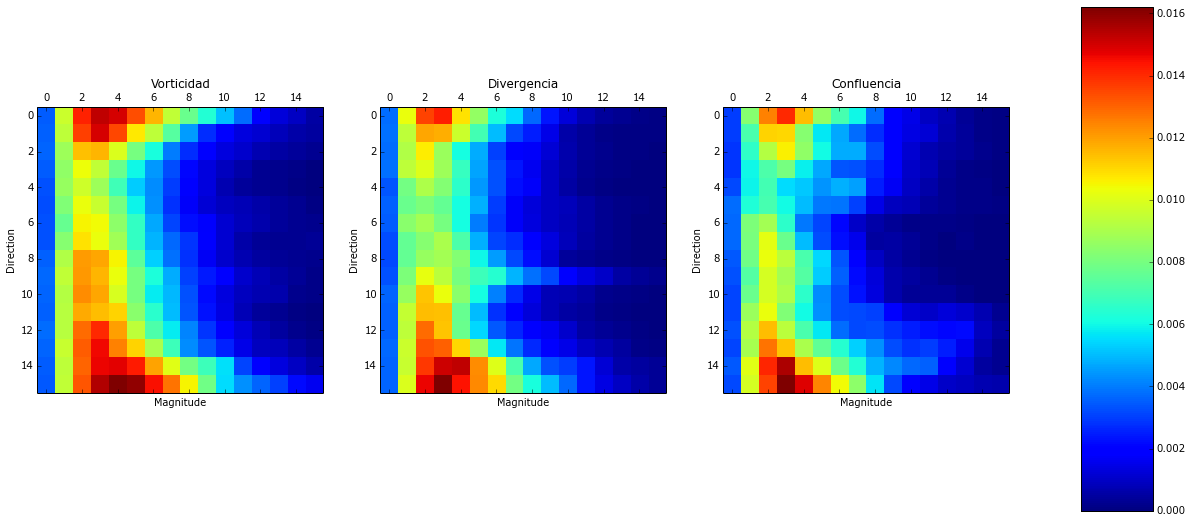

In [5]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(1,3,1)
ax.matshow(m1)
ax.set_title('Vorticidad')
#ax.set_xticks(tick_marks, target_names)
#ax.set_yticks(tick_marks, target_names)
ax.set_ylabel('Direction')
ax.set_xlabel('Magnitude')
    
ax = plt.subplot(1,3,2)
ax.matshow(m2)
ax.set_title('Divergencia')
#ax.set_xticks(tick_marks, target_names)
#ax.set_yticks(tick_marks, target_names)
ax.set_ylabel('Direction')
ax.set_xlabel('Magnitude')
    
ax = plt.subplot(1,3,3)
im = ax.matshow(m3)
ax.set_title('Confluencia')
#ax.set_xticks(tick_marks, target_names)
    #ax.set_yticks(tick_marks, target_names)
ax.set_ylabel('Direction')
ax.set_xlabel('Magnitude')
    
fig.subplots_adjust(right=0.8)
    
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()

## Training

In [6]:
features = listfeatures['joint']['listfeatures']
Xjoint = np.asarray([x[0][0] for x in features])
trainXjoint = np.append(Xjoint[:404], Xjoint[584:],axis=0)
testXjoint = Xjoint[404:584]

In [49]:
skf = cross_validation.StratifiedKFold(trainlabels, n_folds=5)
train_indices=[]
test_indices=[]
for train_index, test_index in skf:
    y_train = trainlabels[train_index]
    y_train, y_index = oversample_label(y_train, train_index)
    train_indices.append(y_index)
    test_indices.append(test_index)
custom_cv=zip(train_indices, test_indices)

In [50]:
Cparameters = []
for a in range(-2,2):
    Cparameters.append(2 ** a)
Gammaparameters = []
for a in range(-2,2):
    Gammaparameters.append(2 ** a)
    
tuned_parameters = [{'kernel': ['rbf'], 'gamma': Gammaparameters,
                     'C': Cparameters},
                    {'kernel': ['linear'], 'C': Cparameters}]

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(trainXjoint)
clf = grid_search.GridSearchCV(estimator=svm.SVC(), param_grid=tuned_parameters, n_jobs=-1, cv=custom_cv, scoring=make_scorer(get_average_precision))
clf.fit(X, trainlabels)

GridSearchCV(cv=[(array([128, 129, ..., 731, 592]), array([  0,   1, ..., 395, 396])), (array([  0,   1, ..., 735, 979]), array([128, 129, ..., 578, 579])), (array([  0,   1, ..., 160, 577]), array([291, 292, ..., 735, 736])), (array([  0,   1, ..., 167, 399]), array([511, 512, ..., 920, 921])), (array([  0,   1, ..., 340, 576]), array([716, 717, ..., 984, 985]))],
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048], 'gamma': [0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.00...5, 0.015625, 0.03125, 0.0625

In [10]:
print("The best parameters are %s with a score of %0.2f"
      % (clf.best_params_, clf.best_score_))

The best parameters are {'kernel': 'linear', 'C': 0.00048828125} with a score of 0.43


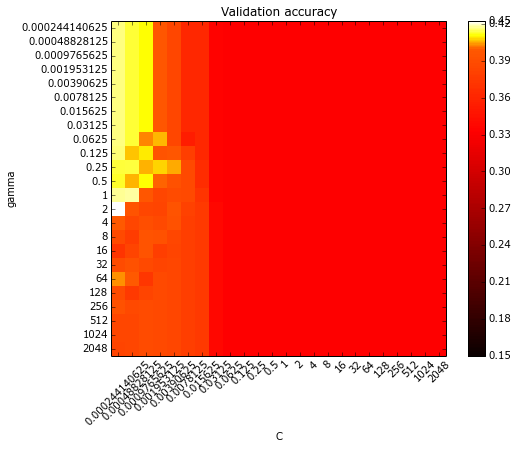

In [12]:
scores = [x[1] for x in clf.grid_scores_[:24*24]]
scores = np.array(scores).reshape(len(Cparameters), len(Gammaparameters))
plt.figure(figsize=(8, 6))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.15, midpoint=0.40))
plt.xlabel('C')
plt.ylabel('gamma')
plt.colorbar()
plt.xticks(np.arange(len(Cparameters)), Cparameters, rotation=45)
plt.yticks(np.arange(len(Gammaparameters)), Gammaparameters)
plt.title('Validation accuracy')
plt.show()

In [15]:
clftest = svm.SVC(kernel='linear', C= 0.00048828125)
labels, y_index = oversample_label(trainlabels, np.arange(len(trainlabels)))
X = trainXjoint[y_index]
scaler = StandardScaler()
X = scaler.fit_transform(X)
clftest.fit(X, labels)
#Xtest = testXjoint
Xtest = scaler.transform(testXjoint)
result = clftest.predict(Xtest)
print get_average_precision(testlabels, result, printable=True)

[[ 0.40594059  0.38613861  0.20792079]
 [ 0.57142857  0.33333333  0.0952381 ]
 [ 0.24324324  0.45945946  0.2972973 ]]
0.345523741563


### Using Pyramidal features

In [60]:
features = listfeatures['pyramidal']['listfeatures']
Xpyr = np.asarray([x[0][0] for x in features])
trainXpyr = np.append(Xpyr[:404], Xpyr[584:],axis=0)
testXpyr = Xpyr[404:584]

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(trainXpyr)
clf = grid_search.GridSearchCV(estimator=svm.SVC(), param_grid=tuned_parameters, n_jobs=-1, cv=custom_cv, scoring=make_scorer(get_average_precision))
clf.fit(X, trainlabels)

GridSearchCV(cv=[(array([128, 129, ..., 913, 606]), array([  0,   1, ..., 395, 396])), (array([  0,   1, ..., 160, 585]), array([128, 129, ..., 578, 579])), (array([  0,   1, ..., 948, 777]), array([291, 292, ..., 735, 736])), (array([  0,   1, ..., 334, 191]), array([511, 512, ..., 920, 921])), (array([  0,   1, ..., 324, 402]), array([716, 717, ..., 984, 985]))],
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.125, 0.25, 0.5, 1, 2, 4], 'gamma': [0.125, 0.25, 0.5, 1, 2, 4]}, {'kernel': ['linear'], 'C': [0.125, 0.25, 0.5, 1, 2, 4]}],
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(get_average_precision), verbose=0)

In [18]:
print("The best parameters are %s with a score of %0.2f"
      % (clf.best_params_, clf.best_score_))

The best parameters are {'kernel': 'linear', 'C': 0.125} with a score of 0.45


In [61]:
clftest = svm.SVC(kernel='linear', C= 0.125)
labels, y_index = oversample_label(trainlabels, np.arange(len(trainlabels)))
X = trainXpyr[y_index]
scaler = StandardScaler()
X = scaler.fit_transform(X)
clftest.fit(X, labels)
#Xtest = testXjoint
Xtest = scaler.transform(testXpyr)
result = clftest.predict(Xtest)
print get_average_precision(testlabels, result, printable=True)

[[ 0.67326733  0.1980198   0.12871287]
 [ 0.54761905  0.26190476  0.19047619]
 [ 0.72972973  0.16216216  0.10810811]]
0.347760065582


## Using divergence and curl

In [21]:
features = listfeatures['divcurl']['listfeatures']
Xdivcurl = np.asarray([x[0][0] for x in features])
trainXdivcurl = np.append(Xdivcurl[:404], Xdivcurl[584:],axis=0)
testXdivcurl = Xdivcurl[404:584]

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(trainXdivcurl)
clf = grid_search.GridSearchCV(estimator=svm.SVC(), param_grid=tuned_parameters, n_jobs=-1, cv=custom_cv, scoring=make_scorer(get_average_precision))
clf.fit(X, trainlabels)

GridSearchCV(cv=[(array([128, 129, ..., 745, 775]), array([  0,   1, ..., 395, 396])), (array([  0,   1, ..., 314, 606]), array([128, 129, ..., 578, 579])), (array([  0,   1, ..., 967, 192]), array([291, 292, ..., 735, 736])), (array([  0,   1, ..., 926, 570]), array([511, 512, ..., 920, 921])), (array([  0,   1, ..., 175, 391]), array([716, 717, ..., 984, 985]))],
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.25, 0.5, 1, 2], 'gamma': [0.25, 0.5, 1, 2]}, {'kernel': ['linear'], 'C': [0.25, 0.5, 1, 2]}],
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(get_average_precision), verbose=0)

In [24]:
print("The best parameters are %s with a score of %0.2f"
      % (clf.best_params_, clf.best_score_))

The best parameters are {'kernel': 'linear', 'C': 0.5} with a score of 0.36


In [25]:
clftest = svm.SVC(kernel='linear', C= 0.125)
labels, y_index = oversample_label(trainlabels, np.arange(len(trainlabels)))
X = trainXdivcurl[y_index]
scaler = StandardScaler()
X = scaler.fit_transform(X)
clftest.fit(X, labels)
#Xtest = testXjoint
Xtest = scaler.transform(testXdivcurl)
result = clftest.predict(Xtest)
print get_average_precision(testlabels, result, printable=True)

[[ 0.58415842  0.28712871  0.12871287]
 [ 0.26190476  0.47619048  0.26190476]
 [ 0.59459459  0.35135135  0.05405405]]
0.371467648695


## Using pyramidal over divergence and curl

In [56]:
features = listfeatures['pvector']['listfeatures']
Xpvector = np.asarray([x[0][0] for x in features])
trainXpvector = np.append(Xpvector[:404], Xpvector[584:],axis=0)
testXpvector = Xpvector[404:584]

In [71]:
scaler = StandardScaler()
X = scaler.fit_transform(trainXpvector)
clf = grid_search.GridSearchCV(estimator=svm.SVC(), param_grid=tuned_parameters, n_jobs=-1, cv=custom_cv, scoring=make_scorer(get_average_precision))
clf.fit(X, trainlabels)

GridSearchCV(cv=[(array([128, 129, ..., 731, 609]), array([  0,   1, ..., 395, 396])), (array([  0,   1, ..., 555, 586]), array([128, 129, ..., 578, 579])), (array([  0,   1, ..., 910, 579]), array([291, 292, ..., 735, 736])), (array([  0,   1, ..., 355, 192]), array([511, 512, ..., 920, 921])), (array([  0,   1, ..., 749, 574]), array([716, 717, ..., 984, 985]))],
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.25, 0.5, 1, 2], 'gamma': [0.25, 0.5, 1, 2]}, {'kernel': ['linear'], 'C': [0.25, 0.5, 1, 2]}],
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(get_average_precision), verbose=0)

In [72]:
print("The best parameters are %s with a score of %0.2f"
      % (clf.best_params_, clf.best_score_))

The best parameters are {'kernel': 'rbf', 'C': 0.25, 'gamma': 0.25} with a score of 0.33


In [78]:
clftest = svm.SVC(kernel='linear', C= 0.000125)
labels, y_index = oversample_label(trainlabels, np.arange(len(trainlabels)))
X = trainXpvector[y_index]
scaler = StandardScaler()
X = scaler.fit_transform(X)
clftest.fit(X, labels)
#Xtest = testXjoint
Xtest = scaler.transform(testXpvector)
result = clftest.predict(Xtest)
print get_average_precision(testlabels, result, printable=True)

[[ 0.62376238  0.30693069  0.06930693]
 [ 0.45238095  0.47619048  0.07142857]
 [ 0.56756757  0.24324324  0.18918919]]
0.429714013872


## Miscelaneous

In [1]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold
import sklearn.metrics as metrics
import scipy.io
import h5py
from sklearn import svm, grid_search
from sklearn import cross_validation, grid_search
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from IPython.display import display, Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import pandas as pd
%matplotlib inline

import base64
import skimage.io

class Image(skimage.io.Image):
    def __init__(self, *args, **kwargs):
        self._width = kwargs.pop('width', '100%')
        skimage.io.Image.__init__(self, *args, **kwargs)
    def _repr_html_(self):
        out = '<img width="%s"' % self._width
        out += ' src="data:image/png;base64,' + \
               base64.b64encode(np.compat.asbytes(self._repr_png_())) + '"/>'
        return out


class side_by_side():
    def __init__(self, *frames):
        self.frames = frames

    def _repr_html_(self):
        s = ""
        for f in self.frames:
            s += "<div style='float: left;'>" + f._repr_html_() + "</div>"

        return s
def all_same(items):
    return all(x == items[0] for x in items)
def get_samples(features):
    X = np.asarray([x[0][0] for x in features])
    label = np.asarray([x[1][0][0] for x in features])
    return X, label

def oversample_label(y, y_index):
    counts = np.bincount(y)
    classes = np.unique(y)
    counts = counts[1:]
    maxvalue = counts[counts.argmax()]

    copydf = y.copy()
    #print counts, classes, counts.argmax(), maxvalue, len(copydf)
    while not all_same(counts):
        minvalue = classes[counts.argmin()]
        tmp = copydf[copydf == minvalue]
        tmp_index = y_index[copydf == minvalue]
        #print tmp_index
        xrandom = np.random.randint(len(tmp))
        y = np.append(y, tmp[xrandom])
        y_index = np.append(y_index, tmp_index[xrandom])
        counts = np.bincount(y)
        counts = counts[1:]
        #print counts
    return y, y_index
def get_average_precision(y_true, y_scores, printable=False):
    cm = confusion_matrix(y_true, y_scores)
    cm_normalized = []
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    a = np.mean(np.diag(cm_normalized))
    if printable:
        print cm_normalized
    return a

from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))